In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#FWD_17_20_df = pd.read_csv(Path('data/FWD_17_20_sum_df.csv'))
#FWD_17_20_df = pd.read_csv(Path('data/FWD_17_20_avg_df.csv'))
FWD_17_20_df = pd.read_csv(Path('data/Merged_FWD_17_20_sum_df.csv'))
FWD_17_20_df

,Player,Gls,Ast,xG,npxG,xA,Sh,SoT,Fls,Fld,Crs,TklW,Int,CrdY,CrdR,MP,PKmiss,FantPts
0,Aaron Connolly,2,0,2.2,2.2,0.2,23,8,11,26,7,4,0,0,0,17,0,51.5
1,Adam Idah,0,0,0.0,0.0,0.0,0,0,0,2,0,3,0,0,0,2,0,3.5
2,Adama Traoré,3,6,1.6,1.6,4.1,36,12,36,53,113,19,14,1,0,55,0,129.5
3,Alexandre Lacazette,33,14,29.3,27.8,8.1,187,77,110,104,55,57,28,8,0,86,0,611.5
4,Alireza Jahanbakhsh,1,0,1.1,1.1,0.2,23,7,12,10,33,17,9,1,0,25,0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Trézéguet,3,1,2.0,2.0,0.4,27,7,17,18,38,14,11,3,1,24,0,67.5
104,Wesley Moraes,5,1,5.4,4.6,0.9,35,17,43,14,7,10,4,3,0,21,1,72.0
105,Willian,12,16,10.9,9.3,13.0,138,49,27,81,321,52,37,5,0,94,0,444.0
106,Xherdan Shaqiri,10,7,7.3,6.6,3.9,58,30,25,44,141,9,19,5,0,66,1,249.0


### Goals vs Expected 

Very simply, xG (or expected goals) is the probability that a shot will result in a goal based on the characteristics of that shot and the events leading up to it. Some of these characteristics/variables include:

Location of shooter: How far was it from the goal and at what angle on the pitch?
Body part: Was it a header or off the shooter's foot?
Type of pass: Was it from a through ball, cross, set piece, etc?
Type of attack: Was it from an established possession? Was it off a rebound? Did the defense have time to get in position? Did it follow a dribble?

Comparing xG to actual goals scored can indicate a player's shooting ability or luck. A player who consistently scores more goals than their total xG probably has an above average shooting/finishing ability.

In [3]:
X = FWD_17_20_df.xG.values.reshape(-1, 1)
y = FWD_17_20_df.Gls

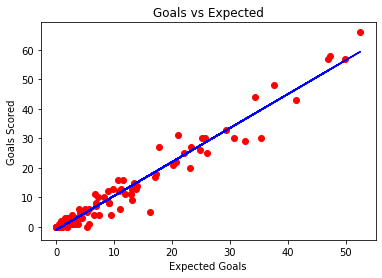

In [4]:
# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Goals vs Expected')
    plt.xlabel('Expected Goals')
    plt.ylabel('Goals Scored')
    plt.show()
    return
viz_linear()

In [5]:
# Predicting a new result with Linear Regression
#model_pred = lin_reg.predict(X.reshape(-1,1))
model_pred = lin_reg.predict(X)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(model.coef_)
print(model.intercept_)
#print(y_pred.shape)
print(r2_score(y, model_pred))

[1.1519097]
-1.032263338559451
0.9558748364973754


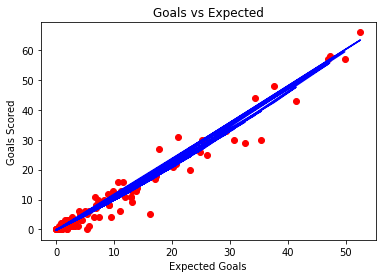

In [6]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Goals vs Expected')
    plt.xlabel('Expected Goals')
    plt.ylabel('Goals Scored')
    plt.show()
    return
viz_polymonial()

In [7]:
# Predicting a new result with Polymonial Regression
y_pred = pol_reg.predict(X_poly)
print(r2_score(y, y_pred))

0.9599458222072861


#### 3 degrees

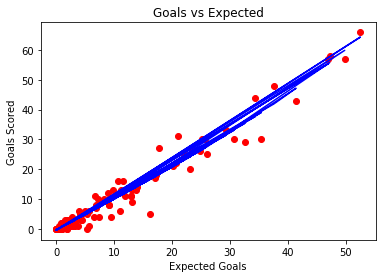

0.96020578046268


In [8]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
viz_polymonial()
y_pred = pol_reg.predict(X_poly)
print(r2_score(y, y_pred))

#### 4 degrees 

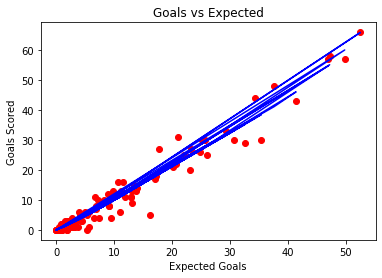

0.9607670648624211


In [9]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
viz_polymonial()
y_pred = pol_reg.predict(X_poly)
print(r2_score(y, y_pred))

#### 5 degrees

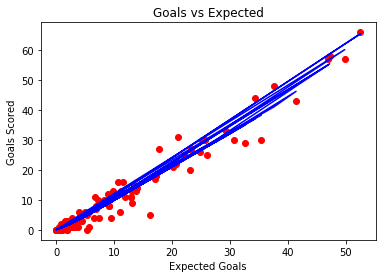

0.9608176570284964


In [10]:
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
viz_polymonial()
y_pred = pol_reg.predict(X_poly)
print(r2_score(y, y_pred))

In [11]:
# Fitting Logistic Regression to the dataset
#from sklearn.model_selection import train_test_split 
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
#from sklearn.linear_model import LogisticRegression 
#classifier = LogisticRegression(solver='lbfgs',max_iter=400, random_state = 1) 
#classifier.fit(Xtrain, ytrain)
#y_pred = classifier.predict(Xtest) 

In [13]:
#from sklearn.metrics import confusion_matrix 
#cm = confusion_matrix(ytest, y_pred) 
  
#print ("Confusion Matrix : \n", cm) 

In [14]:
#from sklearn.metrics import accuracy_score 
#print ("Accuracy : ", accuracy_score(ytest, y_pred))

In [15]:
# Fitting Logistic Regression to the dataset
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
#classifier = LogisticRegression(solver='lbfgs',max_iter=400, random_state = 1) 
#classifier.fit(Xtrain, ytrain)
#y_pred = classifier.predict(Xtest)

In [17]:
#print ("Accuracy : ", accuracy_score(ytest, y_pred))

### Assists vs Expected 

xA, or expected assists, is the xG which follows a pass that assists a shot. This indicates a player's ability to set up scoring chances without having to rely on the actual result of the shot or the shooter's luck/ability. Note: Because xA comes from passes, not all assists will be given an xA value.

In [18]:
X = FWD_17_20_df.xA.values.reshape(-1, 1)
y = FWD_17_20_df.Ast

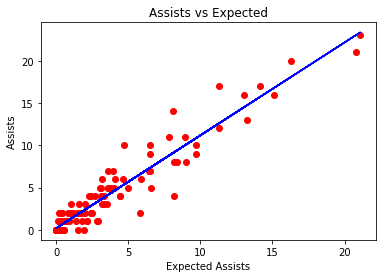

In [19]:
# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Assists vs Expected')
    plt.xlabel('Expected Assists')
    plt.ylabel('Assists')
    plt.show()
    return
viz_linear()

In [20]:
# Predicting a new result with Linear Regression
model_pred = lin_reg.predict(X)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(model.coef_)
print(model.intercept_)
#print(y_pred.shape)
print(r2_score(y, model_pred))

[1.09829406]
0.19311011253459665
0.9106135322830958


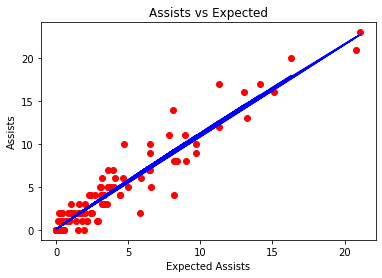

In [21]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Assists vs Expected')
    plt.xlabel('Expected Assists')
    plt.ylabel('Assists')
    plt.show()
    return
viz_polymonial()

In [22]:
# Predicting a new result with Polymonial Regression
y_pred = pol_reg.predict(X_poly)
print(r2_score(y, y_pred))

0.9112023136588392


#### 3 degrees

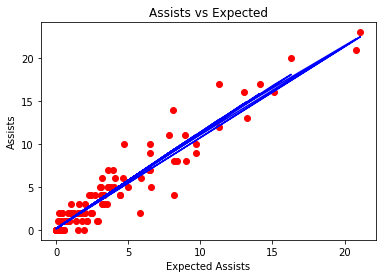

0.9114036136413632


In [23]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
viz_polymonial()
y_pred = pol_reg.predict(X_poly)
print(r2_score(y, y_pred))

#### 4 degrees 

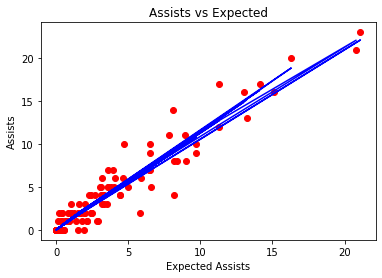

0.912608667033043


In [24]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
viz_polymonial()
y_pred = pol_reg.predict(X_poly)
print(r2_score(y, y_pred))

#### 5 degrees 

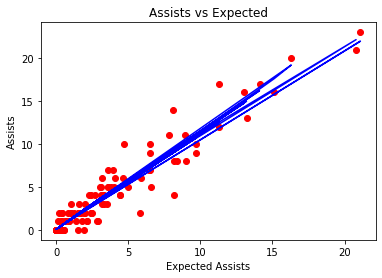

0.9128018339491071


In [25]:
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
viz_polymonial()
y_pred = pol_reg.predict(X_poly)
print(r2_score(y, y_pred))

##  Fantasy Points

### Goals

In [26]:
X = FWD_17_20_df.Gls.values.reshape(-1, 1)
y = FWD_17_20_df.FantPts

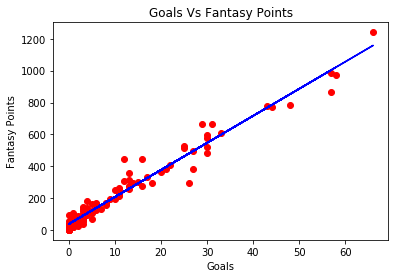

In [27]:
# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Goals Vs Fantasy Points')
    plt.xlabel('Goals')
    plt.ylabel('Fantasy Points')
    plt.show()
    return
viz_linear()

In [28]:
# Predicting a new result with Linear Regression
model_pred = lin_reg.predict(X)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(model.coef_)
print(model.intercept_)
#print(y_pred.shape)
print(r2_score(y, model_pred))

[16.9602766]
38.12346197365801
0.9607549408170555


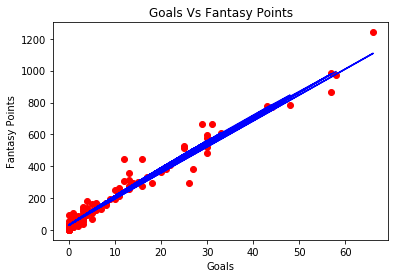

In [29]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Goals Vs Fantasy Points')
    plt.xlabel('Goals')
    plt.ylabel('Fantasy Points')
    plt.show()
    return
viz_polymonial()

In [30]:
# Predicting a new result with Polymonial Regression
y_pred = pol_reg.predict(X_poly)
print(r2_score(y, y_pred))

0.9623693299867898



#### 3 degrees 

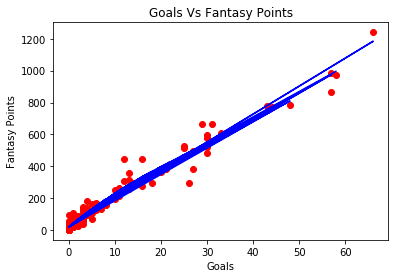

0.9657062717716223


In [31]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
viz_polymonial()
y_pred = pol_reg.predict(X_poly)
print(r2_score(y, y_pred))

#### 4 degrees  

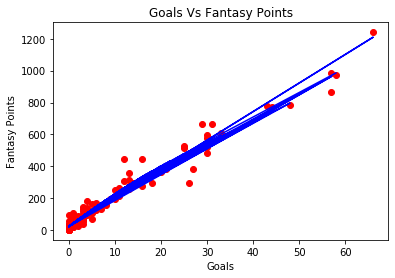

0.966086827105014


In [32]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
viz_polymonial()
y_pred = pol_reg.predict(X_poly)
print(r2_score(y, y_pred))

#### 5 degrees 

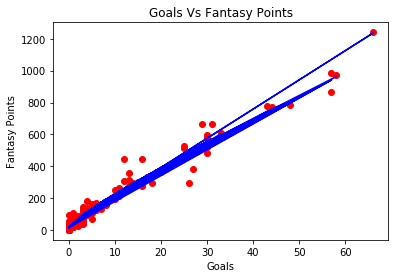

0.9671474184982269


In [33]:
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
viz_polymonial()
y_pred = pol_reg.predict(X_poly)
print(r2_score(y, y_pred))

### Assists 

In [34]:
X = FWD_17_20_df.Ast.values.reshape(-1, 1)
y = FWD_17_20_df.FantPts

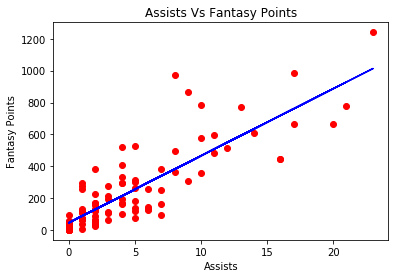

In [35]:
# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Assists Vs Fantasy Points')
    plt.xlabel('Assists')
    plt.ylabel('Fantasy Points')
    plt.show()
    return
viz_linear()

In [36]:
# Predicting a new result with Linear Regression
model_pred = lin_reg.predict(X)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(model.coef_)
print(model.intercept_)
#print(y_pred.shape)
print(r2_score(y, model_pred))

[42.04492911]
45.75011411846836
0.7198809155627972


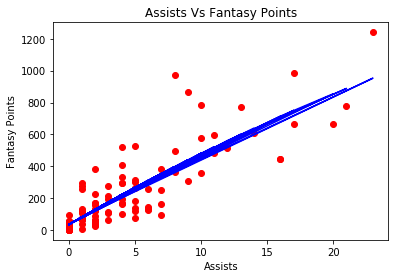

In [37]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Assists Vs Fantasy Points')
    plt.xlabel('Assists')
    plt.ylabel('Fantasy Points')
    plt.show()
    return
viz_polymonial()

In [38]:
# Predicting a new result with Polymonial Regression
y_pred = pol_reg.predict(X_poly)
print(r2_score(y, y_pred))

0.7222294113381197


#### 3 degrees 

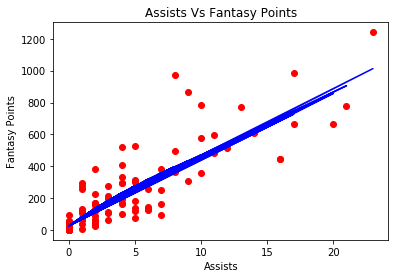

0.724364946353618


In [39]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
viz_polymonial()
y_pred = pol_reg.predict(X_poly)
print(r2_score(y, y_pred))

#### 4 degrees 

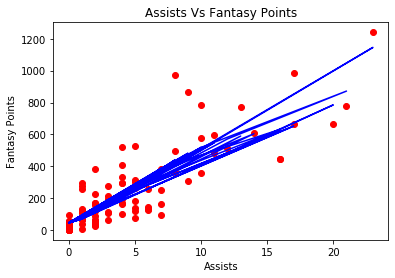

0.7385195037324079


In [40]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
viz_polymonial()
y_pred = pol_reg.predict(X_poly)
print(r2_score(y, y_pred))

#### 5 degrees 

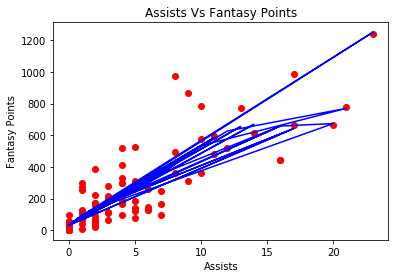

0.7517766338356253


In [41]:
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
viz_polymonial()
y_pred = pol_reg.predict(X_poly)
print(r2_score(y, y_pred))

### Matches Played 

In [42]:
X = FWD_17_20_df.MP.values.reshape(-1, 1)
y = FWD_17_20_df.FantPts

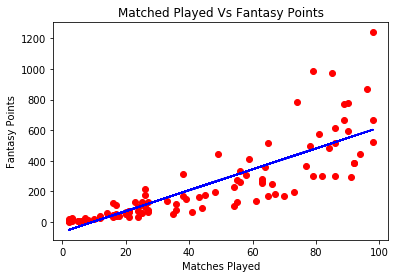

In [43]:
# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Matched Played Vs Fantasy Points')
    plt.xlabel('Matches Played')
    plt.ylabel('Fantasy Points')
    plt.show()
    return
viz_linear()

In [44]:
# Predicting a new result with Linear Regression
model_pred = lin_reg.predict(X)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(model.coef_)
print(model.intercept_)
#print(y_pred.shape)
print(r2_score(y, model_pred))

[6.83743811]
-66.93811371070763
0.6851086289807063


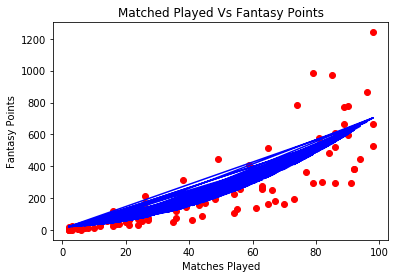

In [45]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Matched Played Vs Fantasy Points')
    plt.xlabel('Matches Played')
    plt.ylabel('Fantasy Points')
    plt.show()
    return
viz_polymonial()

In [46]:
# Predicting a new result with Polymonial Regression
y_pred = pol_reg.predict(X_poly)
print(r2_score(y, y_pred))

0.7212496768530859


#### 3 degrees 

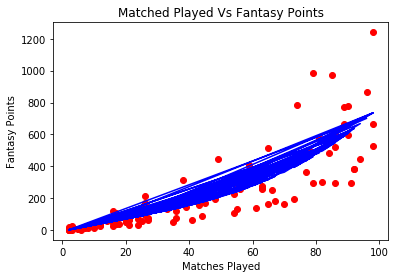

0.7241277384236654


In [47]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
viz_polymonial()
y_pred = pol_reg.predict(X_poly)
print(r2_score(y, y_pred))

#### 4 degrees 

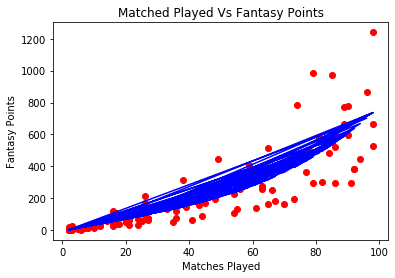

0.7241335341874856


In [48]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
viz_polymonial()
y_pred = pol_reg.predict(X_poly)
print(r2_score(y, y_pred))

#### 5 degrees 

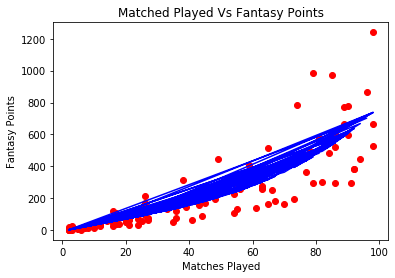

0.7241354564801492


In [49]:
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
viz_polymonial()
y_pred = pol_reg.predict(X_poly)
print(r2_score(y, y_pred))